In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder

# Data Wrangling 

In [2]:
def wrangle(filename):
    df = pd.read_csv(filename)
    #droping columns which are irrelevant
    df.drop(columns=["Owner"],inplace= True)
    #changing catagorical values by one-hot-ecoding 
    pd.get_dummies(df, columns=['Fuel_Type', 'Selling_type', 'Transmission'])
    # Drop a specific column (replace 'ColumnName' with the actual column name)

    
    return df

In [3]:
df=wrangle("car data.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 18.9+ KB


In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual


In [6]:
corr=df.corr()

C:\Users\Hp\AppData\Local\Temp\ipykernel_6136\1726683880.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

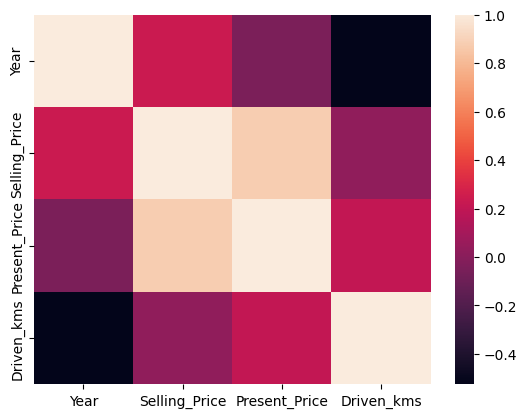

In [7]:
sns.heatmap(corr)

# splitting the Data into trainind and testing sets

In [8]:
X = df.drop(['Selling_Price', 'Car_Name'], axis=1)  # Features
y = df['Selling_Price']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Using One hot encoding 

In [10]:
from sklearn.compose import ColumnTransformer
# Define categorical features to be one-hot encoded
categorical_features = ['Fuel_Type', 'Selling_type', 'Transmission']

# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'  # Passthrough other columns
)

# Create the pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor())
])

# Fit the model using the pipeline
model_car=pipeline.fit(X_train, y_train)

# Make predictions
y_pred = model_car.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.8353830191803283
R-squared: 0.9637351065068697


In [11]:
new_data = pd.DataFrame({
    'Car_Name': ['ritz'],  # Provide a new car model name
    'Year': [2022],               # Year of the car
    'Present_Price': [15.5],      # Current market price of the car
    'Driven_kms': [30000],        # Number of kilometers driven
    'Fuel_Type': ['Petrol'],      # Type of fuel (e.g., Petrol, Diesel)
    'Selling_type': ['Dealer'],   # Type of selling (e.g., Dealer, Individual)
    'Transmission': ['Manual']    # Type of transmission (e.g., Manual, Automatic)
})

In [12]:
Y_pre1=model_car.predict(new_data)

In [13]:
Y_pre1

array([11.5176])

In [14]:
# Using Gid cv for hyperparameter optimization 

In [16]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')
print(f'Best Parameters: {grid_search.best_params_}')


Mean Squared Error: 0.8492322546383771
R-squared: 0.9631338959994544
Best Parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
